In [2]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
path = './WDI_csv/WDIData.csv'
RAW_DATA = pd.read_csv(path)

In [15]:
FILLED_DATA = RAW_DATA.iloc[:, 4:].interpolate(axis=1).bfill().ffill().replace(np.nan, 0)

In [16]:
FILLED_DATA = RAW_DATA.iloc[:, [0, 2]].join(FILLED_DATA)

In [17]:
indCount = FILLED_DATA.loc[0:1442, 'Indicator Name'].shape[0]

indCount

1443

In [18]:
ndf = FILLED_DATA.drop([*[str(yr) for yr in range(1960, 2000)], 'Unnamed: 65'], axis=1)

In [19]:
a = [[ndf.loc[i*indCount, 'Country Name'], 
      *ndf.loc[i*indCount:i*indCount+indCount-1, '2010']] 
     for i in range(int(ndf.shape[0]/indCount))]

df = pd.DataFrame(a, columns=['Country Name', 
                       *ndf.loc[:indCount-1, 'Indicator Name']])

df

,Country Name,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)","Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 15+)",...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,Africa Eastern and Southern,15.658101,28.233373,16.241064,62.520824,5.235829,5.235829,5.235829,5.235829,5.235829,...,58.363084,58.363084,58.363084,58.363084,58.363084,58.363084,58.363084,58.363084,58.363084,7.147027
1,Africa Western and Central,7.147027,41.730881,20.552615,74.158184,5.232387,5.232387,5.232387,5.232387,5.232387,...,58.668407,58.668407,58.668407,58.668407,58.668407,58.668407,58.668407,58.668407,58.668407,84.717091
2,Arab World,84.717091,86.065072,73.670292,96.342894,85.433100,85.433100,85.433100,85.433100,85.433100,...,39.634196,39.634196,39.634196,39.634196,39.634196,39.634196,39.634196,39.634196,39.634196,88.078809
3,Caribbean small states,88.078809,93.398309,89.702142,97.128428,90.645840,90.645840,90.645840,90.645840,90.645840,...,49.011497,49.011497,49.011497,49.011497,49.011497,49.011497,49.011497,49.011497,49.011497,99.011290
4,Central Europe and the Baltics,99.011290,100.000000,100.000000,100.000000,94.756660,94.756660,94.756660,94.756660,94.756660,...,46.005661,46.005661,46.005661,46.005661,46.005661,46.005661,46.005661,46.005661,46.005661,46.005661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Virgin Islands (U.S.),100.000000,100.000000,100.000000,100.000000,9.356177,9.356177,9.356177,9.356177,9.356177,...,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000,99.900000
262,West Bank and Gaza,99.900000,99.900000,99.900000,99.900000,18.966153,18.966153,18.966153,18.966153,18.966153,...,20.600000,20.600000,20.600000,20.600000,20.600000,20.600000,20.600000,20.600000,59.900002,59.900002
263,"Yemen, Rep.",59.900002,60.674675,42.358517,100.000000,13.742200,13.742200,13.742200,13.742200,13.742200,...,10.262500,10.262500,10.262500,10.262500,10.262500,10.262500,10.262500,32.300000,38.400000,200.000000
264,Zambia,15.900000,22.000000,3.959453,49.800000,34.565313,34.565313,34.565313,34.565313,34.565313,...,55.471429,38.985714,28.871429,36.900000,38.528571,33.128571,7.385714,37.228571,60.000000,25000.000000


In [8]:
targets = ['GNI (current US$)']

pd.DataFrame([ndf.loc[ndf.loc[:, 'Indicator Name']==target].iloc[0] for target in targets])

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
493,Africa Eastern and Southern,GNI (current US$),2.734503e+11,2.483187e+11,2.543656e+11,3.398060e+11,4.236033e+11,4.931133e+11,5.524760e+11,6.298731e+11,...,9.024215e+11,9.159905e+11,9.275131e+11,9.503103e+11,8.913149e+11,8.537421e+11,9.586492e+11,9.856960e+11,9.854681e+11,9.016064e+11


In [9]:
a = [[ndf.loc[i*indCount, 'Country Name'], 
      ndf.loc[i*indCount+493, '2010'],
      ndf.loc[i*indCount+493, '2020']] 
      for i in range(int(ndf.shape[0]/indCount))]
      #*ndf.loc[i*indCount+493:i*indCount+494, ['2010', '2018']], 
      #*ndf.loc[i*indCount+498:i*indCount+499, '2018']] 
      #for i in range(int(ndf.shape[0]/indCount))]

a = pd.DataFrame(a, columns=['Country Name', 'GNI 2010', 'GNI 2020'])
targdf = a.join(pd.DataFrame(100*(a.iloc[:, 2]-a.iloc[:, 1])/a.iloc[:, 1], columns=['GNI % Growth']))
targdf = targdf.replace(np.nan, 0)

targdf

,Country Name,GNI 2010,GNI 2020,GNI % Growth
0,Africa Eastern and Southern,8.092621e+11,9.016064e+11,11.410923
1,Africa Western and Central,5.496154e+11,7.572770e+11,37.783077
2,Arab World,2.271419e+12,2.465056e+12,8.524908
3,Caribbean small states,6.224279e+10,6.320885e+10,1.552074
4,Central Europe and the Baltics,1.270567e+12,1.610585e+12,26.761088
...,...,...,...,...
261,Virgin Islands (U.S.),4.202160e+09,3.460860e+09,-17.640934
262,West Bank and Gaza,1.028060e+10,1.810720e+10,76.129798
263,"Yemen, Rep.",2.908777e+10,2.158954e+10,-25.777952
264,Zambia,1.890256e+10,1.760166e+10,-6.882158


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

In [11]:
targdf.loc[:, 'GNI % Growth'].describe()

count    2.660000e+02
mean     5.561419e+08
std      6.757265e+09
min     -9.071173e+01
25%      4.152765e+00
50%      2.725394e+01
75%      5.409001e+01
max      1.022658e+11
Name: GNI % Growth, dtype: float64

In [12]:
(targdf.loc[:, 'GNI % Growth']>30).sum() / targdf.shape[0]

0.47368421052631576

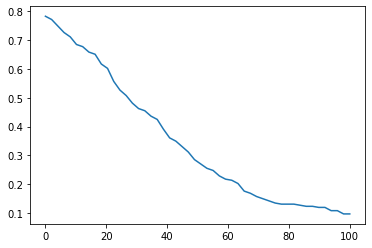

In [13]:
ls = np.linspace(0, 100)
p = []
for th in ls:
    p.append((targdf.loc[:, 'GNI % Growth']>th).sum() / targdf.shape[0])
    
plt.plot(ls, p)

In [14]:
#pd.DataFrame(p, index=ls)

In [15]:
pd.DataFrame(p, index=ls).iloc[[10, 19], :]

,0
20.408163,0.601504
38.775510,0.390977


In [5]:
from sklearn.linear_model import LogisticRegressionCV

In [6]:
from sklearn.preprocessing import StandardScaler

In [18]:
pl = Pipeline([
    ('scaler', StandardScaler()), 
    ('estimator', LogisticRegressionCV(n_jobs=-1))])

In [19]:
X = df.drop('Country Name', axis=1)
y = targdf.loc[:, 'GNI % Growth']>20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
pl.fit(X_train, y_train)
pl.score(X_test, y_test)

0.6666666666666666

In [ ]:
scores = pl.named_steps['estimator'].scores_[True]

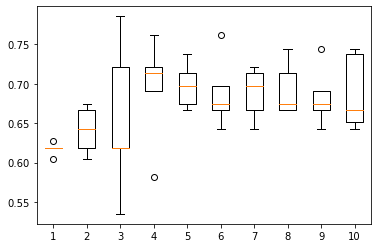

In [ ]:
plt.boxplot(scores)
plt.show()

In [7]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

In [24]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

models = {
    'LogisticRegressionCV': LogisticRegressionCV(), 
    'LinearSVC': LinearSVC(), 
    'DecisionTreeClassifier': DecisionTreeClassifier(), 
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'GaussianNB': GaussianNB()}

scores = []
for m in models:
    scores.append(cross_validate(models[m], X_train_transformed, y_train, n_jobs=-1))

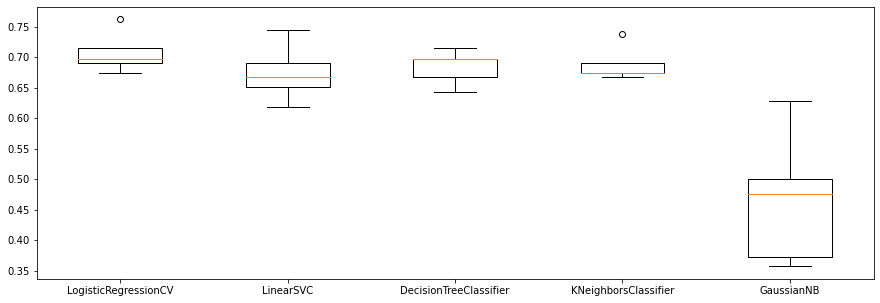

In [25]:
plt.figure(figsize=(15, 5))
plt.boxplot(pd.DataFrame(scores).loc[:, 'test_score'], labels=models.keys())
plt.show()

In [26]:
pd.DataFrame(scores).loc[:, 'test_score'][3]

array([0.6744186 , 0.6744186 , 0.73809524, 0.66666667, 0.69047619])

In [8]:
from sklearn.cluster import KMeans

In [28]:
km = KMeans()

In [29]:
km.fit(X_train)

KMeans()

In [30]:
km.score(X_test)

-9.272560819635583e+28

In [20]:
ndf = RAW_DATA.drop([*[str(yr) for yr in range(1960, 2000)], 'Unnamed: 65'], axis=1)

In [21]:
a = [[ndf.loc[i*indCount, 'Country Name'], 
      *ndf.loc[i*indCount:i*indCount+indCount-1, '2010']] 
     for i in range(int(ndf.shape[0]/indCount))]

impute_df = pd.DataFrame(a, columns=['Country Name', 
                       *ndf.loc[:indCount-1, 'Indicator Name']])

impute_df

,Country Name,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)","Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 15+)",...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,Africa Eastern and Southern,15.658101,28.233373,16.241064,62.520824,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.363084,NaN
1,Africa Western and Central,7.147027,41.730881,20.552615,74.158184,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.668407,NaN
2,Arab World,84.717091,86.065072,73.670292,96.342894,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.634196,NaN
3,Caribbean small states,88.078809,93.398309,89.702142,97.128428,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.011497,NaN
4,Central Europe and the Baltics,99.011290,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Virgin Islands (U.S.),NaN,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,West Bank and Gaza,NaN,99.900000,99.900000,99.900000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.6,NaN,NaN
263,"Yemen, Rep.",59.900002,60.674675,42.358517,100.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.400000,200.0
264,Zambia,15.900000,22.000000,3.959453,49.800000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,25000.0


In [9]:
from sklearn.impute import SimpleImputer

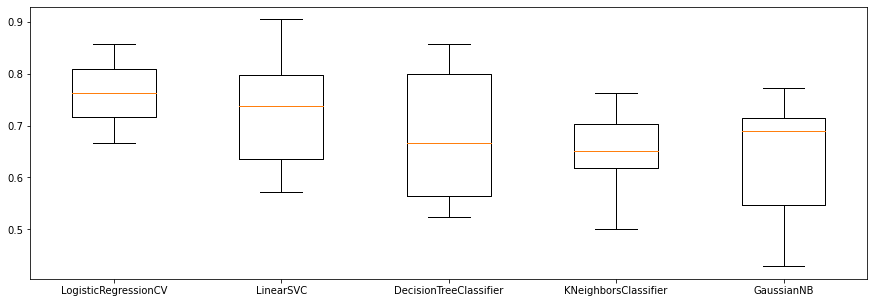

In [47]:
imputer = SimpleImputer()

th = 30
X = impute_df.drop('Country Name', axis=1)
y = targdf.loc[:, 'GNI % Growth']>th

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

models = {
    'LogisticRegressionCV': LogisticRegressionCV(), 
    'LinearSVC': LinearSVC(), 
    'DecisionTreeClassifier': DecisionTreeClassifier(), 
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'GaussianNB': GaussianNB()}

scores = []
for m in models:
    scores.append(cross_validate(models[m], X_train_transformed, y_train, cv=10, n_jobs=-1))
    


plt.figure(figsize=(15, 5))
plt.boxplot(pd.DataFrame(scores).loc[:, 'test_score'], labels=models.keys())
plt.show()

In [10]:
from sklearn.impute import KNNImputer

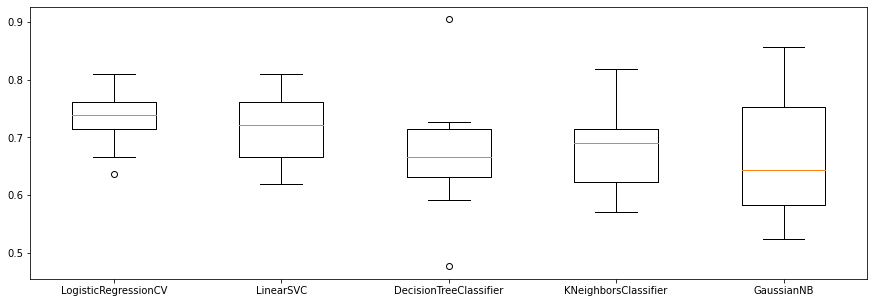

In [48]:
imputer = KNNImputer()

th = 30
X = impute_df.drop('Country Name', axis=1)
y = targdf.loc[:, 'GNI % Growth']>th

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

model = LogisticRegressionCV()
model.fit(X_train_transformed, y_train)
model.score(X_test_transformed, y_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

models = {
    'LogisticRegressionCV': LogisticRegressionCV(), 
    'LinearSVC': LinearSVC(), 
    'DecisionTreeClassifier': DecisionTreeClassifier(), 
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'GaussianNB': GaussianNB()}

scores = []
for m in models:
    scores.append(cross_validate(models[m], X_train_transformed, y_train, cv=10, n_jobs=-1))
    


plt.figure(figsize=(15, 5))
plt.boxplot(pd.DataFrame(scores).loc[:, 'test_score'], labels=models.keys())
plt.show()

In [11]:
from sklearn.impute import MissingIndicator

In [ ]:
imputer = MissingIndicator()

th = 30
X = impute_df.drop('Country Name', axis=1)
y = targdf.loc[:, 'GNI % Growth']>th

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

model = LogisticRegressionCV()
model.fit(X_train_transformed, y_train)
model.score(X_test_transformed, y_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

models = {
    'LogisticRegressionCV': LogisticRegressionCV(), 
    'LinearSVC': LinearSVC(), 
    'DecisionTreeClassifier': DecisionTreeClassifier(), 
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'GaussianNB': GaussianNB()}

scores = []
for m in models:
    scores.append(cross_validate(models[m], X_train_transformed, y_train, cv=10, n_jobs=-1))
    


plt.figure(figsize=(15, 5))
plt.boxplot(pd.DataFrame(scores).loc[:, 'test_score'], labels=models.keys())
plt.show()

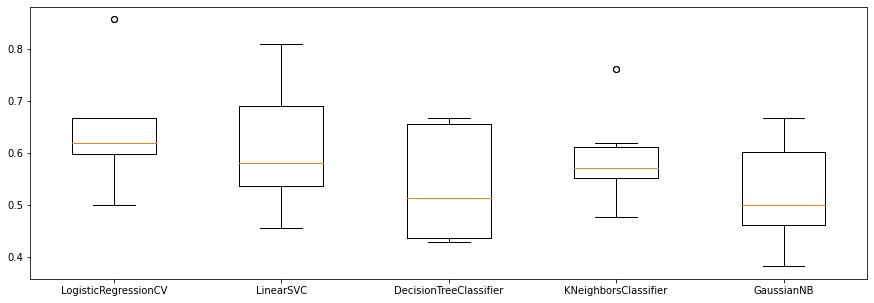

In [53]:
plt.figure(figsize=(15, 5))
plt.boxplot(pd.DataFrame(scores).loc[:, 'test_score'], labels=models.keys())
plt.show()

In [22]:
targets = ['GNI per capita, Atlas method (current US$)']

pd.DataFrame([ndf.loc[ndf.loc[:, 'Indicator Name']==target].iloc[0] for target in targets])

a = [[ndf.loc[i*indCount, 'Country Name'], 
      ndf.loc[i*indCount+499, '2010'],
      ndf.loc[i*indCount+499, '2020']] 
      for i in range(int(ndf.shape[0]/indCount))]
      #*ndf.loc[i*indCount+493:i*indCount+494, ['2010', '2018']], 
      #*ndf.loc[i*indCount+498:i*indCount+499, '2018']] 
      #for i in range(int(ndf.shape[0]/indCount))]

a = pd.DataFrame(a, columns=['Country Name', 'GNI per capita 2010', 'GNI per capita 2020'])
targdf = a.join(pd.DataFrame(100*(a.iloc[:, 2]-a.iloc[:, 1])/a.iloc[:, 1], 
                             columns=['GNI per capita % Growth']))
targdf = targdf.replace(np.nan, 0)

targdf

,Country Name,GNI per capita 2010,GNI per capita 2020,GNI per capita % Growth
0,Africa Eastern and Southern,1436.909102,1406.289007,-2.130970
1,Africa Western and Central,1575.796473,1654.425660,4.989806
2,Arab World,6275.787261,5932.741870,-5.466173
3,Caribbean small states,8956.417816,8875.085909,-0.908085
4,Central Europe and the Baltics,12816.274184,15784.589614,23.160518
...,...,...,...,...
261,Virgin Islands (U.S.),0.000000,0.000000,0.000000
262,West Bank and Gaza,2510.000000,3710.000000,47.808765
263,"Yemen, Rep.",1200.000000,0.000000,0.000000
264,Zambia,1340.000000,1160.000000,-13.432836


In [98]:
targdf.describe()

,GNI per capita 2010,GNI per capita 2020,GNI per capita % Growth
count,266.000000,266.000000,266.000000
mean,11417.102958,11743.054514,18.884165
std,17576.329469,17931.039214,34.750166
min,0.000000,0.000000,-59.935380
25%,1160.660144,1308.862485,0.000000
50%,4134.150743,4485.000000,8.518416
75%,11493.017265,12409.863470,34.000623
max,103480.000000,112240.000000,153.750000


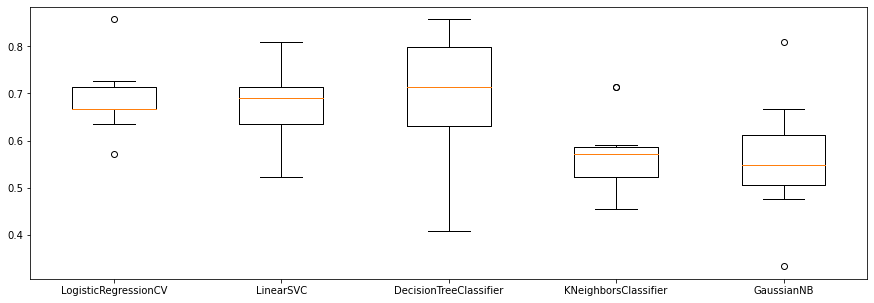

In [68]:
imputer = SimpleImputer()

th = 8
X = impute_df.drop('Country Name', axis=1)
y = targdf.loc[:, 'GNI per capita % Growth']>th

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

models = {
    'LogisticRegressionCV': LogisticRegressionCV(), 
    'LinearSVC': LinearSVC(), 
    'DecisionTreeClassifier': DecisionTreeClassifier(), 
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'GaussianNB': GaussianNB()}

scores = []
for m in models:
    scores.append(cross_validate(models[m], X_train_transformed, y_train, cv=10, n_jobs=-1))
    


plt.figure(figsize=(15, 5))
plt.boxplot(pd.DataFrame(scores).loc[:, 'test_score'], labels=models.keys())
plt.show()

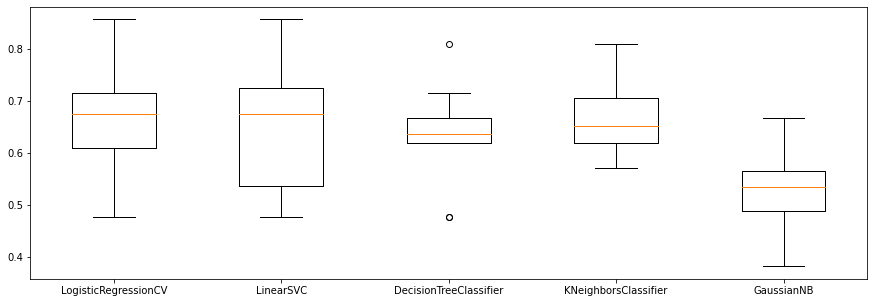

In [70]:
imputer = KNNImputer()

th = 8
X = impute_df.drop('Country Name', axis=1)
y = targdf.loc[:, 'GNI per capita % Growth']>th

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

model = LogisticRegressionCV()
model.fit(X_train_transformed, y_train)
model.score(X_test_transformed, y_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

models = {
    'LogisticRegressionCV': LogisticRegressionCV(), 
    'LinearSVC': LinearSVC(), 
    'DecisionTreeClassifier': DecisionTreeClassifier(), 
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'GaussianNB': GaussianNB()}

scores = []
for m in models:
    scores.append(cross_validate(models[m], X_train_transformed, y_train, cv=10, n_jobs=-1))
    


plt.figure(figsize=(15, 5))
plt.boxplot(pd.DataFrame(scores).loc[:, 'test_score'], labels=models.keys())
plt.show()

In [ ]:
imputer = MissingIndicator()

th = 8
X = impute_df.drop('Country Name', axis=1)
y = targdf.loc[:, 'GNI per capita % Growth']>th

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

model = LogisticRegressionCV()
model.fit(X_train_transformed, y_train)
model.score(X_test_transformed, y_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

models = {
    'LogisticRegressionCV': LogisticRegressionCV(), 
    'LinearSVC': LinearSVC(), 
    'DecisionTreeClassifier': DecisionTreeClassifier(), 
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'GaussianNB': GaussianNB()}

scores = []
for m in models:
    scores.append(cross_validate(models[m], X_train_transformed, y_train, cv=10, n_jobs=-1))
    


plt.figure(figsize=(15, 5))
plt.boxplot(pd.DataFrame(scores).loc[:, 'test_score'], labels=models.keys())
plt.show()

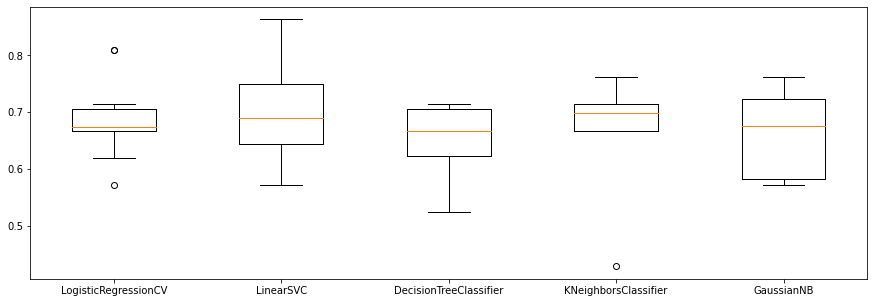

In [60]:
plt.figure(figsize=(15, 5))
plt.boxplot(pd.DataFrame(scores).loc[:, 'test_score'], labels=models.keys())
plt.show()

In [100]:
targdf.describe()

,GNI per capita 2010,GNI per capita 2020,GNI per capita % Growth
count,266.000000,266.000000,266.000000
mean,11417.102958,11743.054514,18.884165
std,17576.329469,17931.039214,34.750166
min,0.000000,0.000000,-59.935380
25%,1160.660144,1308.862485,0.000000
50%,4134.150743,4485.000000,8.518416
75%,11493.017265,12409.863470,34.000623
max,103480.000000,112240.000000,153.750000


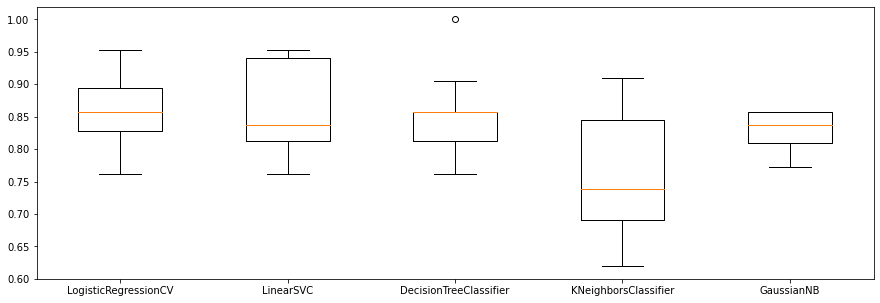

In [104]:
imputer = SimpleImputer()

th = 4485
X = impute_df.drop('Country Name', axis=1)
y = targdf.loc[:, 'GNI per capita 2020']>th

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

models = {
    'LogisticRegressionCV': LogisticRegressionCV(), 
    'LinearSVC': LinearSVC(), 
    'DecisionTreeClassifier': DecisionTreeClassifier(), 
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'GaussianNB': GaussianNB()}

scores = []
for m in models:
    scores.append(cross_validate(models[m], X_train_transformed, y_train, cv=10, n_jobs=-1))
    


plt.figure(figsize=(15, 5))
plt.boxplot(pd.DataFrame(scores).loc[:, 'test_score'], labels=models.keys())
plt.show()

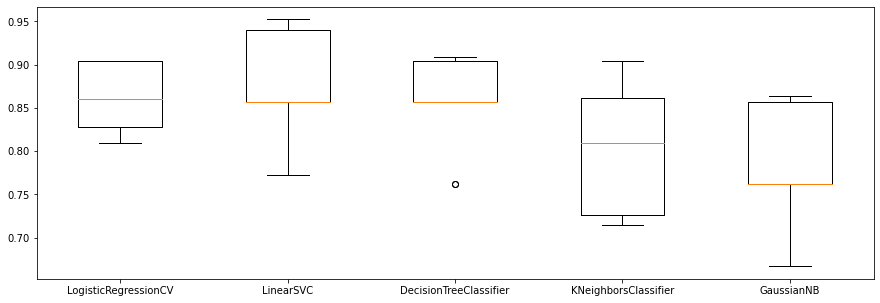

In [105]:
imputer = KNNImputer()

th = 4485
X = impute_df.drop('Country Name', axis=1)
y = targdf.loc[:, 'GNI per capita 2020']>th

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

model = LogisticRegressionCV()
model.fit(X_train_transformed, y_train)
model.score(X_test_transformed, y_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

models = {
    'LogisticRegressionCV': LogisticRegressionCV(), 
    'LinearSVC': LinearSVC(), 
    'DecisionTreeClassifier': DecisionTreeClassifier(), 
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'GaussianNB': GaussianNB()}

scores = []
for m in models:
    scores.append(cross_validate(models[m], X_train_transformed, y_train, cv=10, n_jobs=-1))
    


plt.figure(figsize=(15, 5))
plt.boxplot(pd.DataFrame(scores).loc[:, 'test_score'], labels=models.keys())
plt.show()

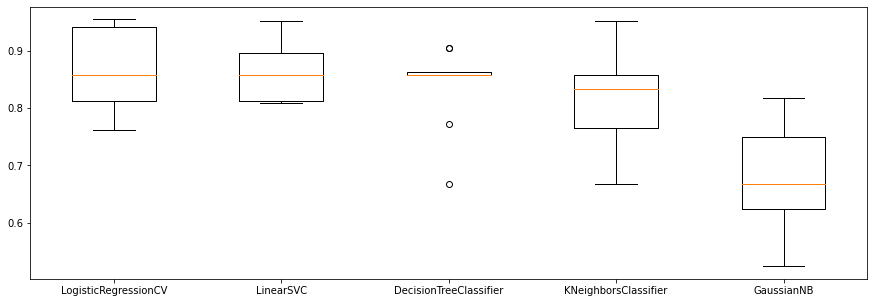

In [108]:
imputer = MissingIndicator()

th = 4485
X = impute_df.drop('Country Name', axis=1)
y = targdf.loc[:, 'GNI per capita 2020']>th

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

model = LogisticRegressionCV()
model.fit(X_train_transformed, y_train)
model.score(X_test_transformed, y_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

models = {
    'LogisticRegressionCV': LogisticRegressionCV(), 
    'LinearSVC': LinearSVC(), 
    'DecisionTreeClassifier': DecisionTreeClassifier(), 
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'GaussianNB': GaussianNB()}

scores = []
for m in models:
    scores.append(cross_validate(models[m], X_train_transformed, y_train, cv=10, n_jobs=-1))
    


plt.figure(figsize=(15, 5))
plt.boxplot(pd.DataFrame(scores).loc[:, 'test_score'], labels=models.keys())
plt.show()

In [12]:
from sklearn.linear_model import LarsCV, LassoCV, LassoLarsCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR, NuSVR

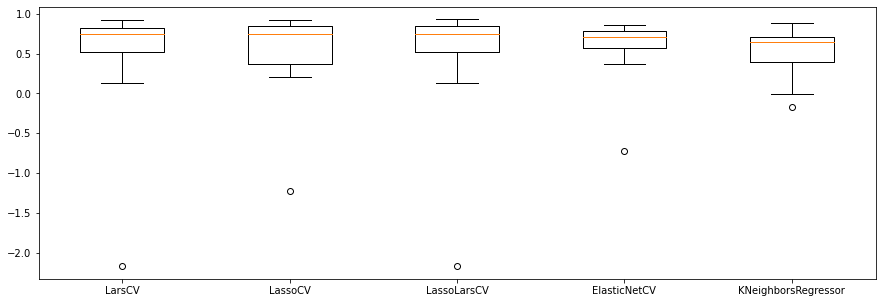

In [149]:
imputer = SimpleImputer()

X = impute_df.drop('Country Name', axis=1)
y = targdf.loc[:, 'GNI per capita 2020']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

models = {
    'LarsCV': LarsCV(max_iter=10), 
    'LassoCV': LassoCV(), 
    'LassoLarsCV': LassoLarsCV(max_iter=10), 
    'ElasticNetCV': ElasticNetCV(),
    'KNeighborsRegressor': KNeighborsRegressor()}
scores = []
for m in models:
    scores.append(cross_validate(models[m], X_train_transformed, y_train, cv=10, n_jobs=-1))
    


plt.figure(figsize=(15, 5))
plt.boxplot(pd.DataFrame(scores).loc[:, 'test_score'], labels=models.keys())
plt.show()

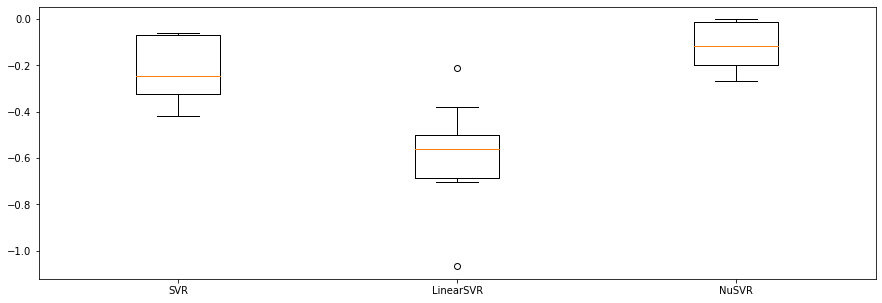

In [142]:
imputer = SimpleImputer()

X = impute_df.drop('Country Name', axis=1)
y = targdf.loc[:, 'GNI per capita 2020']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

models = {
    'SVR': SVR(), 
    'LinearSVR': LinearSVR(), 
    'NuSVR': NuSVR()}

scores = []
for m in models:
    scores.append(cross_validate(models[m], X_train_transformed, y_train, cv=10, n_jobs=-1))
    


plt.figure(figsize=(15, 5))
plt.boxplot(pd.DataFrame(scores).loc[:, 'test_score'], labels=models.keys())
plt.show()

In [173]:
pd.DataFrame([[s['test_score'][i] for s in scores] for i in range(10)], columns=models.keys())

,LarsCV,LassoCV,LassoLarsCV,ElasticNetCV,KNeighborsRegressor
0,0.897112,0.846346,0.930845,0.608871,0.394986
1,0.784396,0.773120,0.784396,0.788563,0.808085
2,-2.174846,-1.226036,-2.174846,-0.728990,-0.166135
3,0.702710,0.711159,0.720255,0.704670,0.396233
4,0.522052,0.562237,0.522052,0.556925,0.606215
5,0.921762,0.917916,0.921762,0.863222,0.882748
6,0.830087,0.825252,0.830087,0.805405,0.679156
7,0.124656,0.209123,0.124656,0.773893,0.711834
8,0.823086,0.866498,0.850331,0.718516,0.686367
9,0.517356,0.308827,0.531636,0.370735,-0.010206


In [177]:
pd.DataFrame([[s['test_score'][i] for s in scores] for i in range(10)], 
             columns=models.keys()).describe()

,LarsCV,LassoCV,LassoLarsCV,ElasticNetCV,KNeighborsRegressor
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.394837,0.479444,0.404117,0.546181,0.498928
std,0.934331,0.645833,0.938665,0.470699,0.348046
min,-2.174846,-1.226036,-2.174846,-0.728990,-0.166135
25%,0.518530,0.372179,0.524448,0.569911,0.395297
50%,0.743553,0.742139,0.752325,0.711593,0.642685
75%,0.828337,0.841072,0.845270,0.784896,0.705467
max,0.921762,0.917916,0.930845,0.863222,0.882748


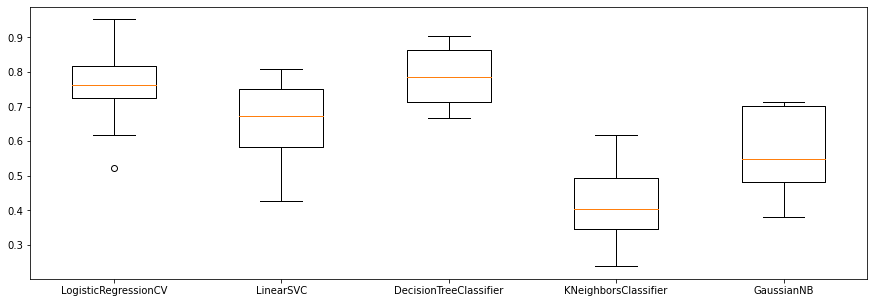

In [23]:
imputer = SimpleImputer()

th = [1046, 4095, 12695]
X = impute_df.drop('Country Name', axis=1)
y = []
for v in targdf.loc[:, 'GNI per capita 2020']:
    if v < th[0]: y.append(0)
    elif v < th[1]: y.append(1)
    elif v < th[2]: y.append(2)
    elif v >= th[2]: y.append(3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

models = {
    'LogisticRegressionCV': LogisticRegressionCV(max_iter=1000), 
    'LinearSVC': LinearSVC(max_iter=1000), 
    'DecisionTreeClassifier': DecisionTreeClassifier(), 
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'GaussianNB': GaussianNB()}

scores = []
for m in models:
    scores.append(cross_validate(models[m], X_train_transformed, y_train, cv=10, n_jobs=-1))
    


plt.figure(figsize=(15, 5))
plt.boxplot(pd.DataFrame(scores).loc[:, 'test_score'], labels=models.keys())
plt.show()

In [24]:
ydf = pd.DataFrame(y)

In [30]:
from sklearn.preprocessing import (MinMaxScaler, Normalizer, PowerTransformer, QuantileTransformer, 
                                   RobustScaler, StandardScaler)

In [50]:
imputer = SimpleImputer()

th = [1046, 4095, 12695]
X = impute_df.drop('Country Name', axis=1)
y = ydf.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler((-1, 1)), 
    'Normalizer': Normalizer(), 
    'PowerTransformer': PowerTransformer(), 
    'QuantileTransformer': QuantileTransformer(), 
    }

scores = {}

In [51]:
s = 'StandardScaler'
X_train_transformed = scalers[s].fit_transform(X_train)
scores[s] = cross_validate(LogisticRegressionCV(max_iter=1000), 
                                 X_train_transformed, y_train, cv=10, n_jobs=-1)['test_score']

In [52]:
s = 'MinMaxScaler'
X_train_transformed = scalers[s].fit_transform(X_train)
scores[s] = cross_validate(LogisticRegressionCV(max_iter=1000), 
                                 X_train_transformed, y_train, cv=10, n_jobs=-1)['test_score']

In [97]:
s = 'PowerTransformer'
X_train_transformed = scalers[s].fit_transform(X_train)
scores[s] = cross_validate(LogisticRegressionCV(max_iter=1000), 
                                 X_train_transformed, y_train, cv=10, n_jobs=-1)['test_score']

/Users/Pkeane22/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [99]:
s = 'QuantileTransformer'
X_train_transformed = scalers[s].fit_transform(X_train)
scores[s] = cross_validate(LogisticRegressionCV(max_iter=1000), 
                                 X_train_transformed, y_train, cv=10, n_jobs=-1)['test_score']

/Users/Pkeane22/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (212). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [123]:
s = 'Normalizer'
X_train_transformed = scalers[s].fit_transform(X_train)
scores[s] = cross_validate(LogisticRegressionCV(tol=1e-1, max_iter=1000), 
                                 X_train_transformed, y_train, cv=10, n_jobs=-1)['test_score']

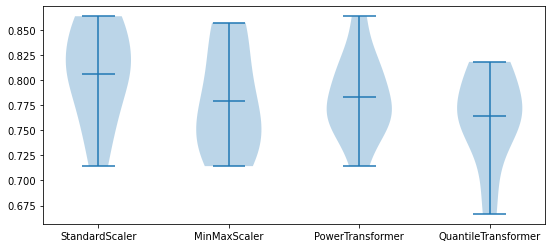

In [315]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
ax.violinplot(scores.values(), showmeans=True)

labels = scores.keys()
ax.set_xticks(np.arange(1, len(labels) + 1))
ax.set_xticklabels(labels)

plt.show()

In [317]:
pipeline = Pipeline([
    ('Imputer', SimpleImputer()),
     ('Scaler', StandardScaler()), 
    ('Classifier', LogisticRegressionCV())])